In [1]:
from quantumML.rest import MWRester

In [2]:
mwr=MWRester()
mwr.get_calculation(space_group_number = 10)
c = mwr.as_pymatgen_struc()
for e in c:
    print(e)

Full Formula (Cu1 Te1 O4)
Reduced Formula: CuTeO4
abc   :   2.996064   6.078667  22.548377
angles:  93.195975  90.000000  90.000000
Sites (6)
  #  SP      a         b         c
---  ----  ---  --------  --------
  0  Cu    0    0         0.056509
  1  Te    0.5  0.5       0.056509
  2  O     0.5  0.814202  0.078196
  3  O     0.5  0.185798  0.034822
  4  O     0    0.457734  0.112871
  5  O     0    0.542266  0.000147
Full Formula (La4 C2 Cl5)
Reduced Formula: La4C2Cl5
abc   :   3.979734   7.976692  26.022557
angles:  89.992903  89.999698  89.998247
Sites (11)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  La    0.99999   0.99998   0
  1  La    0.500012  0.213028  0.115718
  2  La    0.499988  0.786972  0.115718
  3  La    1e-05     2e-05     0.231436
  4  C     0.999917  0.999935  0.088386
  5  C     8.3e-05   6.5e-05   0.14305
  6  Cl    0.499996  0.272206  0.002774
  7  Cl    0.49998   0.727766  0.00277
  8  Cl    0         0.5       0.115718
  

# Queries
- **band_gap_range**  
Range of bandgaps in *eV* as a two valued list eg. [1.2, 3.1]  
- **Formation_energy_range**  
Range of formation energies in *meV* as two values list eg. [50, 150]
- **elements**  
List of elements contained in entry eg. ['Na', 'Cl']  
note: this will return all entries that contain Na and Cl as well as any other element 
- **space_group_number**  
integer of space group number eg. 5
- **dimention**  
integer of dimension of material eg. 2
- **crystal_system**  
crystal system as a string eg. 'Tetragonal'  


In [3]:
help(mwr.get_calculation)

Help on method get_calculation in module quantumML.rest:

get_calculation(band_gap_range=None, formation_energy_range=None, elements=[], space_group_number=None, dimension=None, crystal_system=None, name=None) method of quantumML.rest.MWRester instance
    Method to that queries materialsweb database and returns a list of dictionaries of calculations that
    fit the querries parameters. Additionally
    Parameters:
        band_gap_range (list): List of band gap range e.g. [min, max]
        formation_energy_range (list): List of formation energy range e.g. [min, max]
        elements (list): List of str of elements
        space_group_number (int): space group number
        dimension (int): dimension as int e.g. 1 2 3
        crystal_system (str): name of crystal system
        name (str): name of material e.g. MoS2
    Returns:
        results: List of results matching quire parameters



In [4]:
d = mwr.get_calculation(band_gap_range=[1,1.5], formation_energy_range=[124,150])
for d in mwr.results:
    #print(d.keys())
    if len(d['composition'].split('/')[-2].replace('%',''))< 8:
        print(d['composition'].split('/')[-2].replace('%','')+'\t\t\t BandGap = ' + \
              str(round(d['band_gap'],4))+' eV\t Formation Eneergy = ' + str(d['formation_energy'])+ ' meV')
    elif len(d['composition'].split('/')[-2].replace('%',''))< 16:
        print(d['composition'].split('/')[-2].replace('%','')+'\t\t BandGap = ' + \
              str(round(d['band_gap'],4))+' eV\t Formation Eneergy = ' + str(d['formation_energy'])+ ' meV')
    else:
        print(d['composition'].split('/')[-2].replace('%','')+'\t BandGap = ' + \
              str(round(d['band_gap'],4))+' eV\t Formation Eneergy = ' + str(d['formation_energy'])+ ' meV')


Pd120S2			 BandGap = 1.1746 eV	 Formation Eneergy = 148.0 meV
Ge120Se1		 BandGap = 1.2107 eV	 Formation Eneergy = 133.0 meV
Pd120Se2		 BandGap = 1.3964 eV	 Formation Eneergy = 166.0 meV
I220Pt1			 BandGap = 1.4215 eV	 Formation Eneergy = 135.0 meV
I220Pd1			 BandGap = 1.1512 eV	 Formation Eneergy = 133.0 meV
Br320Cr1		 BandGap = 1.4714 eV	 Formation Eneergy = 742.0 meV
Cr120H120O2		 BandGap = 1.0072 eV	 Formation Eneergy = 179.0 meV
Mo120O3			 BandGap = 1.1381 eV	 Formation Eneergy = 136.0 meV


# Write files

In [ ]:
help(mwr.write)
#help(mwr.write_all)

In [ ]:
import os 
os.mkdir('example')
%cd example
mwr.write_all()
%ls
%cd ..

In [ ]:
%cd ~/dev/quantumML
%pwd

# Machine Learning

In [ ]:
#Convert to list of pymatgen structures
print(help(mwr.as_pymatgen_struc()))
c = mwr.as_pymatgen_struc()

In [ ]:
#mwr.get_symmetry_functions_g2(c[0])
#b.get_soap(b.results[0])
!ls

Query materialsproject for all Cd-Te 

In [2]:
from pymatgen import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter
import os
from pymatgen.io.vasp import inputs
os.mkdir('mldir')
os.chdir('mldir')
a = MPRester('7JGUQgNZyOTTp8Tc')
entries = a.query('Cd-Te',properties = ['structure','formation_energy_per_atom'])
#entries = a.query('Cd-Te',properties = ['formation_energy_per_atom'])
formation_e_actual=[]
i= 0 
for d in entries:
    d['structure'].to(fmt='poscar',filename=str(i)+'.poscar')
    formation_e_actual.append(d['formation_energy_per_atom'])
    i = i +1 

In [ ]:
!ls

In [ ]:
entries = a.query('Cs',properties = ['structure','formation_energy_per_atom'])
for b in entries:
    b['structure'].to(fmt='poscar',filename=str(i)+'.poscar')
    formation_e_actual.append(b['formation_energy_per_atom'])
    i = i +1 
entries = a.query('Sb',properties = ['structure','formation_energy_per_atom'])
for b in entries:
    b['structure'].to(fmt='poscar',filename=str(i)+'.poscar')
    formation_e_actual.append(b['formation_energy_per_atom'])
    i = i +1 

Retreive pre-trained ML model from materialsweb

In [3]:
formation_e_predict=[]
model=MWRester().get_KRR('Cd-Te2')
for i in range(0,10):
    #print(i)
    formation_e_predict.append(model.predict(MWRester().get_soap('./'+str(i)+'.poscar',fmt='poscar'))[0])

http://materialsweb.org/static/models/Cd-Te2.sav


FileNotFoundError: [Errno 2] No such file or directory: './0.poscar'

In [4]:
type(model)

sklearn.svm._classes.SVR

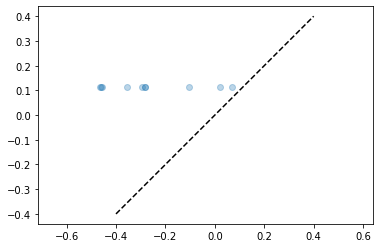

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(formation_e_actual, formation_e_predict, alpha=0.3)
plt.plot([-0.4, 0.4], [-0.4, 0.4], 'k--')
plt.axis('equal')
plt.show()

In [ ]:
!ls
!mkdir temp

In [ ]:
!cd temp
mwr.prep_ml_formation_energy(mwr.results[-1])

In [ ]:
!ls

In [ ]:
!cd /home/jason/dev

In [41]:
from dscribe.descriptors import SOAP
from ase.build import molecule
import numpy as np
from ase.io import vasp
structure = vasp.read_vasp('./POSCAR')
#species = ["H","O"]
rcut = 6.0
nmax = 8
lmax = 6

# Setting up the SOAP descriptor
soap = SOAP(
        periodic=True,
        species=np.unique(structure.get_atomic_numbers()),
        rcut=rcut,
        nmax=nmax,
        lmax=lmax,
        rbf='gto',
        sigma=0.125,
        average='inner'
    )

In [42]:
descriptor = soap.create(structure)

In [52]:
from sklearn.preprocessing import StandardScaler
descriptor = StandardScaler().fit_transform(descriptor)
#descriptor = scaler.transform(descriptor)

In [53]:
descriptor

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [21]:
from ase.io.vasp import write_vasp
write_vasp('POSCAR',water, ignore_constraints = True)

RuntimeError: Lattice vectors must be finite and not coincident. At least one lattice length or angle is zero.